In [1]:
import nibabel as nib 
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
from skimage.metrics import mean_squared_error as mse
from scipy.spatial.distance import jensenshannon
import pandas as pd
from tqdm import tqdm
from math import log10
from scipy.stats import entropy
from scipy.interpolate import make_interp_spline
from scipy.stats import rankdata
from ridgeplot import ridgeplot
import ptitprince as pt
from scipy.stats import wilcoxon, ranksums, mannwhitneyu
from statannotations.Annotator import Annotator

In [2]:
#Show the emphysema distribution for the best epoch on the validation data
b30f_ref = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/soft/emphysema_masked/emph.csv")
b30f_ref = b30f_ref.sort_values(by = "pid")
b50f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/B30f_B50f/hard/emphysema_masked/emph.csv")
b50f = b50f.sort_values(by = "pid")
bone = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/hard/emphysema/emph.csv")
bone = bone.sort_values(by = "pid")
bone_std = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/journal_inference_additional_data/data.application/STANDARD_BONE/soft/emphysema/emph.csv")
bone_std = bone_std.sort_values(by = "pid")


b30f_ref['Kernel'] = 'B30f (reference)'
b50f['Kernel'] = 'B50f'
bone['Kernel'] = 'BONE'
bone_std['Kernel'] = 'STANDARD'

bonetob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_cycgan = bonetob30f_cycgan.sort_values(by = "pid")
stdtob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_cycgan = stdtob30f_cycgan.sort_values(by = "pid")
b50ftob30f_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_cycgan = b50ftob30f_cycgan.sort_values(by = "pid")
bonetostd_cycgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/vanillacyclegan_withheldtest_data_baseline_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_cycgan = bonetostd_cycgan.sort_values(by = "pid")

bonetob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoB30f_emphysema/emph.csv")
bonetob30f_switchgan = bonetob30f_switchgan.sort_values(by = "pid")
stdtob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/STDtoB30f_emphysema/emph.csv")
stdtob30f_switchgan = stdtob30f_switchgan.sort_values(by = "pid")
b50ftob30f_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_switchgan = b50ftob30f_switchgan.sort_values(by = "pid")
bonetostd_switchgan = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/baseline_results/switchcyclegan_inference_data_results/BONEtoSTD_emphysema/emph.csv")
bonetostd_switchgan = bonetostd_switchgan.sort_values(by = "pid")


bonetob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipath = bonetob30f_multipath.sort_values(by = "pid")
stdtob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipath = stdtob30f_multipath.sort_values(by = "pid")
b50ftob30f_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipath = b50ftob30f_multipath.sort_values(by = "pid")
bonetostd_multipath = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/starganL2weightsched_resnetbackbone/withheld_test_harmonized_images/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipath = bonetostd_multipath.sort_values(by = "pid")

bonetob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f_emphysema/emph.csv")
bonetob30f_multipathanatomy = bonetob30f_multipathanatomy.sort_values(by = "pid")
stdtob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f_emphysema/emph.csv")
stdtob30f_multipathanatomy = stdtob30f_multipathanatomy.sort_values(by = "pid")
b50ftob30f_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/B50ftoB30f_emphysema/emph.csv")
b50ftob30f_multipathanatomy = b50ftob30f_multipathanatomy.sort_values(by = "pid")
bonetostd_multipathanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoSTD_emphysema/emph.csv")
bonetostd_multipathanatomy = bonetostd_multipathanatomy.sort_values(by = "pid")


bonetob30f_cycgan['Kernel'] = 'BONEtoB30f'
stdtob30f_cycgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_cycgan['Kernel'] = 'B50ftoB30f'

bonetob30f_switchgan['Kernel'] = 'BONEtoB30f'
stdtob30f_switchgan['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_switchgan['Kernel'] = 'B50ftoB30f'

bonetob30f_multipath['Kernel'] = 'BONEtoB30f'
stdtob30f_multipath['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipath['Kernel'] = 'B50ftoB30f'

bonetob30f_multipathanatomy['Kernel'] = 'BONEtoB30f'
stdtob30f_multipathanatomy['Kernel'] = 'STANDARDtoB30f'
b50ftob30f_multipathanatomy['Kernel'] = 'B50ftoB30f'


emph_before = pd.concat([b30f_ref, b50f, bone, bone_std])
emph_after_multipathanatomy = pd.concat([b30f_ref, b50ftob30f_multipathanatomy,bonetob30f_multipathanatomy,stdtob30f_multipathanatomy])
emph_after_multipath = pd.concat([b30f_ref, b50ftob30f_multipath,bonetob30f_multipath,stdtob30f_multipath])
emph_after_cyclegan = pd.concat([b30f_ref, b50ftob30f_cycgan, bonetob30f_cycgan, stdtob30f_cycgan])
emph_after_switchgan = pd.concat([b30f_ref, b50ftob30f_switchgan, bonetob30f_switchgan, stdtob30f_switchgan])

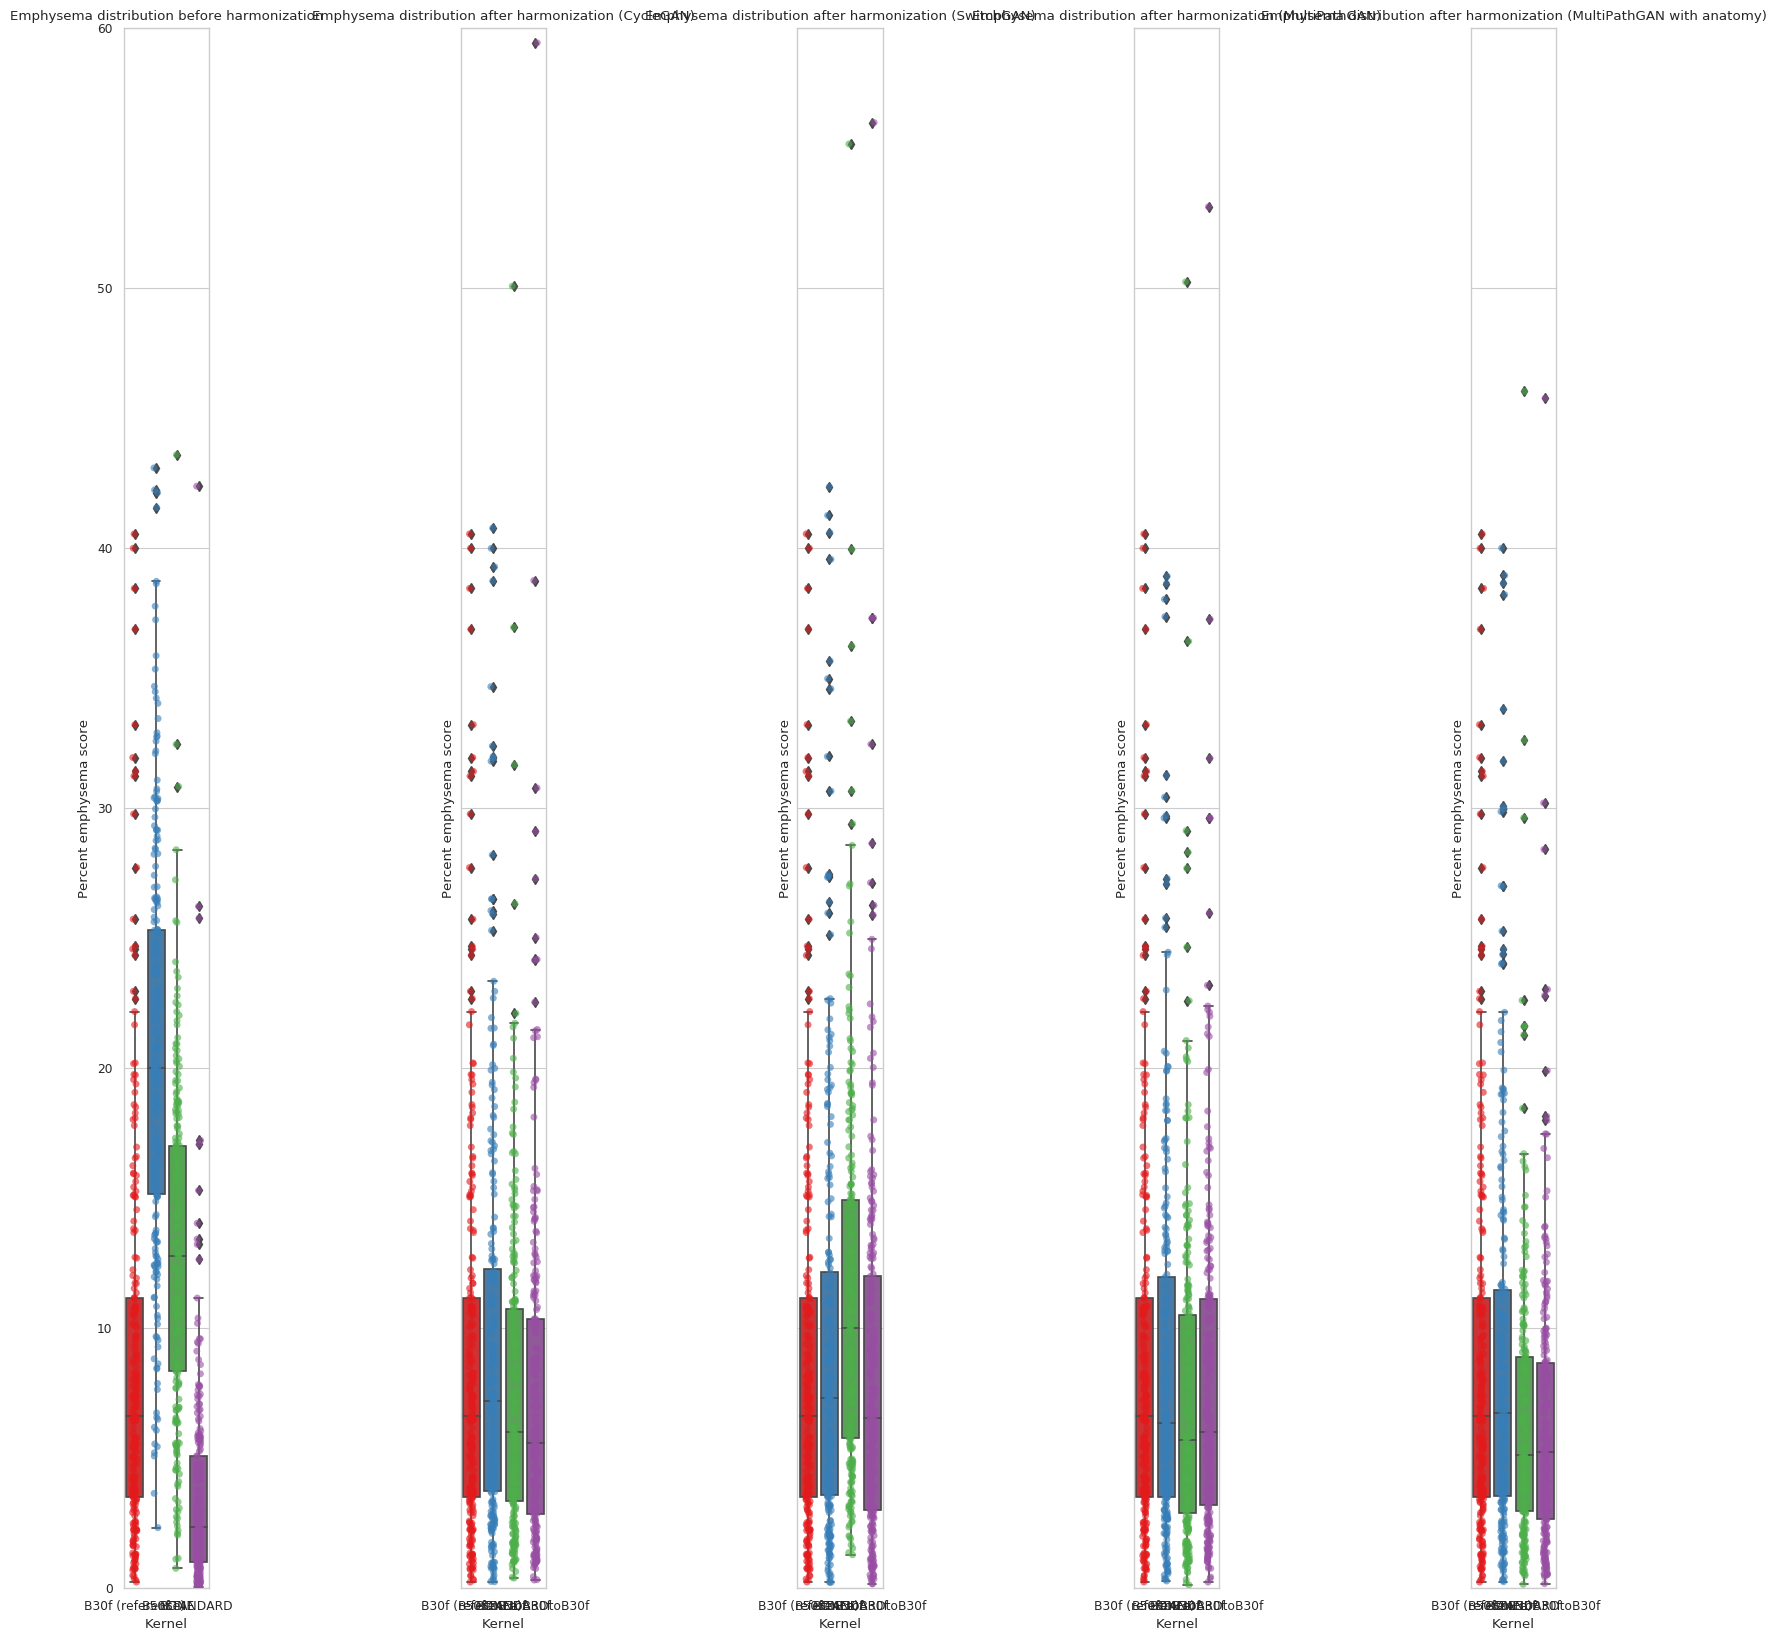

In [3]:
np.random.seed(42)

# Set the theme, context, and style
sns.set_theme()
sns.set_context("paper")
sns.set_style("whitegrid")

# Create a figure with 3 subplots
fig, ax = plt.subplots(1, 5, figsize=(16.5, 16.5), sharey=True)

# Make a violinplot for the emphysema distribution before harmonization
sns.boxplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1")
sns.stripplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1", dodge=True, alpha=0.6)
ax[0].set_title("Emphysema distribution before harmonization")
ax[0].set_ylim(0, 60)
ax[0].set_ylabel("Percent emphysema score")

# Make a violinplot for the emphysema distribution after harmonization (CycleGAN)
sns.boxplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1")
sns.stripplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1", dodge=True, alpha=0.6)
ax[1].set_title("Emphysema distribution after harmonization (CycleGAN)")
ax[1].set_ylim(0, 60)
ax[1].set_ylabel("Percent emphysema score")


# Make a violinplot for the emphysema distribution after harmonization (SwitchGAN)
sns.boxplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1")
sns.stripplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1", dodge=True, alpha=0.6)
ax[2].set_title("Emphysema distribution after harmonization (SwitchGAN)")
ax[2].set_ylim(0, 60)
ax[2].set_ylabel("Percent emphysema score")


sns.boxplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1")
sns.stripplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1", dodge=True, alpha=0.6)
ax[3].set_title("Emphysema distribution after harmonization (MultiPathGAN)")
ax[3].set_ylim(0, 60)
ax[3].set_ylabel("Percent emphysema score")

sns.boxplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1")
sns.stripplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1", dodge=True, alpha=0.6)
ax[4].set_title("Emphysema distribution after harmonization (MultiPathGAN with anatomy)")
ax[4].set_ylim(0, 60)
ax[4].set_ylabel("Percent emphysema score")

# Adjust the layout to prevent overlap
plt.tight_layout()

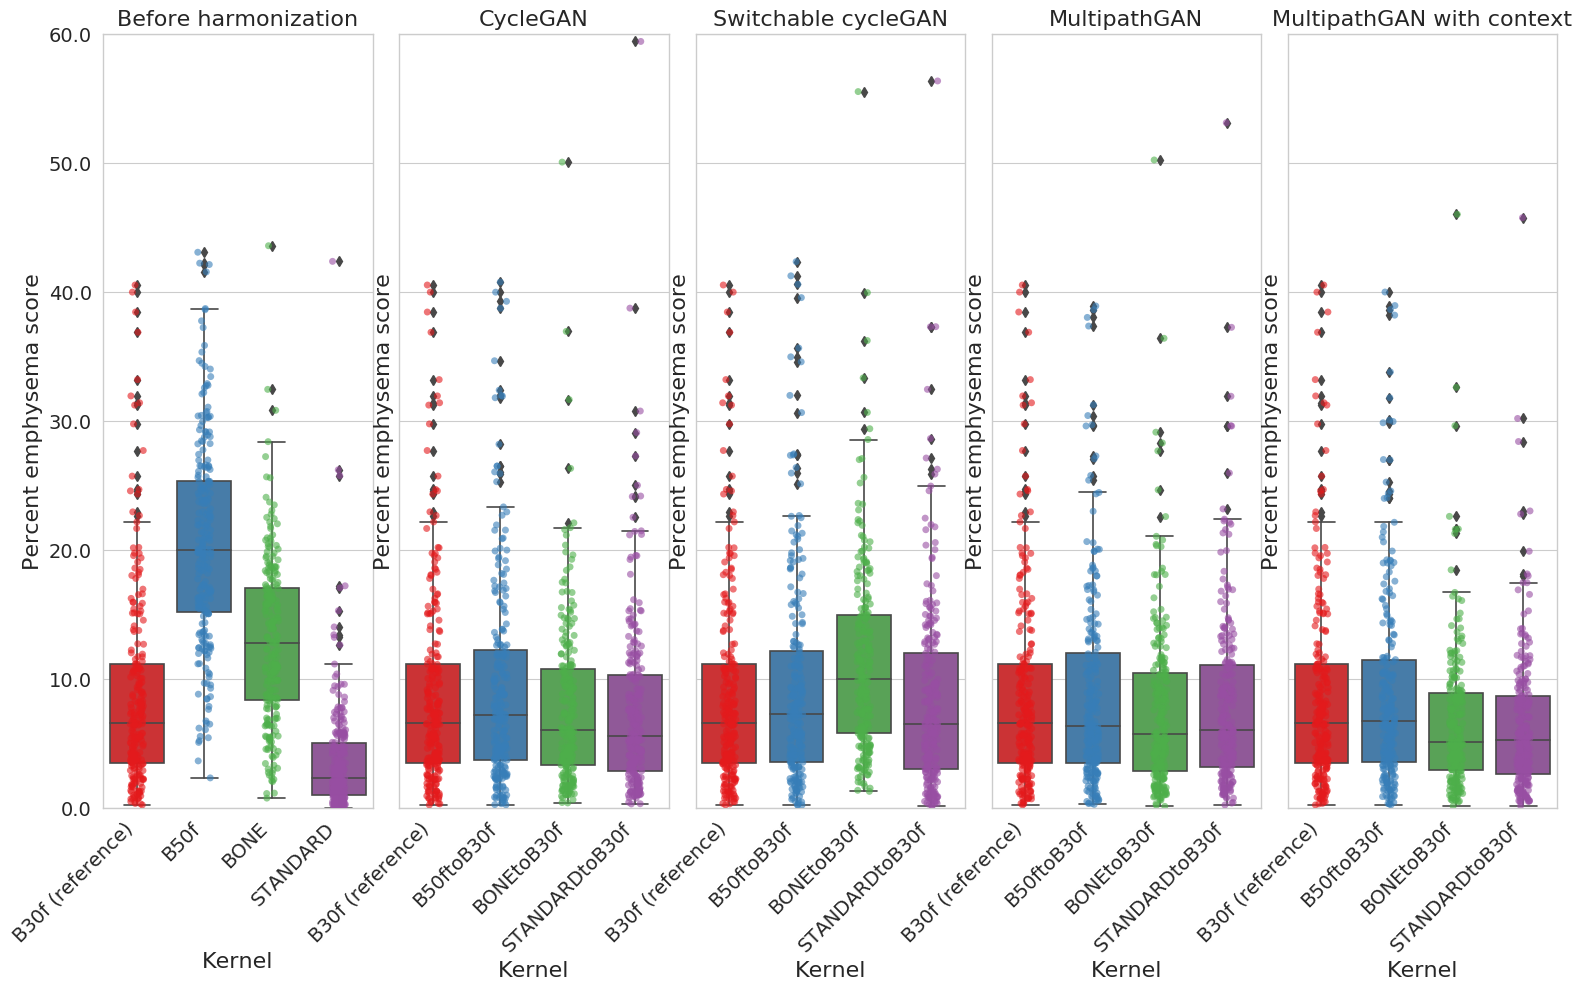

In [6]:
np.random.seed(42)

# Set the theme, context, and style
sns.set_theme()
sns.set_context("paper")
sns.set_style("whitegrid")

# Create a figure with 5 subplots
fig, ax = plt.subplots(1, 5, figsize=(16.5, 10), sharey=True)

# Make a boxplot for the emphysema distribution before harmonization
sns.boxplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1")
sns.stripplot(data=emph_before, x="Kernel", y="emph_score", ax=ax[0], palette="Set1", dodge=True, alpha=0.6)
ax[0].set_title("Before harmonization", fontsize=16)
ax[0].set_ylim(0, 60)
ax[0].set_ylabel("Percent emphysema score", fontsize=16)
ax[0].set_xlabel("Kernel", fontsize=16)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[0].set_yticklabels(ax[0].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (CycleGAN)
sns.boxplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1")
sns.stripplot(data=emph_after_cyclegan, x="Kernel", y="emph_score", ax=ax[1], palette="Set1", dodge=True, alpha=0.6)
ax[1].set_title("CycleGAN", fontsize=16)
ax[1].set_ylim(0, 60)
ax[1].set_ylabel("Percent emphysema score", fontsize=16)
ax[1].set_xlabel("Kernel", fontsize=16)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[1].set_yticklabels(ax[1].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (SwitchGAN)
sns.boxplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1")
sns.stripplot(data=emph_after_switchgan, x="Kernel", y="emph_score", ax=ax[2], palette="Set1", dodge=True, alpha=0.6)
ax[2].set_title("Switchable cycleGAN", fontsize=16)
ax[2].set_ylim(0, 60)
ax[2].set_ylabel("Percent emphysema score", fontsize=16)
ax[2].set_xlabel("Kernel", fontsize=16)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[2].set_yticklabels(ax[2].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (MultiPathGAN)
sns.boxplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1")
sns.stripplot(data=emph_after_multipath, x="Kernel", y="emph_score", ax=ax[3], palette="Set1", dodge=True, alpha=0.6)
ax[3].set_title("MultipathGAN", fontsize=16)
ax[3].set_ylim(0, 60)
ax[3].set_ylabel("Percent emphysema score", fontsize=16)
ax[3].set_xlabel("Kernel", fontsize=16)
ax[3].set_xticklabels(ax[3].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[3].set_yticklabels(ax[3].get_yticks(), fontsize=14)

# Make a boxplot for the emphysema distribution after harmonization (MultiPathGAN with anatomy)
sns.boxplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1")
sns.stripplot(data=emph_after_multipathanatomy, x="Kernel", y="emph_score", ax=ax[4], palette="Set1", dodge=True, alpha=0.6)
ax[4].set_title("MultipathGAN with context", fontsize=16)
ax[4].set_ylim(0, 60)
ax[4].set_ylabel("Percent emphysema score", fontsize=16)
ax[4].set_xlabel("Kernel", fontsize=16)
ax[4].set_xticklabels(ax[4].get_xticklabels(), rotation=45, ha='right', fontsize=14)
ax[4].set_yticklabels(ax[4].get_yticks(), fontsize=14)

# Adjust the layout to remove spaces between subplots and reduce whitespace on the right
plt.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0, right=0.95)
plt.savefig("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/Figures/emphysema_distribution_unpaired.png", dpi=300)

# Show the plot
plt.show()

In [7]:
bonetob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/bonetob30f_finalresults.csv")
stdtob30f = pd.read_csv("/nfs/masi/krishar1/KernelConversionUnpaired/SPIE_journal_extension/stdtob30f_finalresults.csv")

bonetob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/BONEtoB30f.csv")
stdtob30f_multipathwithanatomy = pd.read_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/STDtoB30f.csv")

merged_bonetob30f = pd.merge(bonetob30f, bonetob30f_multipathwithanatomy, on = "Patient")
merged_bonetob30f.to_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/bonetob30f_finalresults.csv")

merged_stdtob30f = pd.merge(stdtob30f, stdtob30f_multipathwithanatomy, on = "Patient")
merged_stdtob30f.to_csv("/valiant02/masi/krishar1/MIDL_experiments/multipathgan_seg_identity_experiments_1-19-25/INFERENCE/stdtob30f_finalresults.csv")

In [8]:
bonetob30f_multi_muscle = list(bonetob30f['Dice_Multipath_Muscle'])
bonetob30f_multi_fat = list(bonetob30f['Dice_Multipath_Fat'])
bonetob30f_cycgan_muscle = list(bonetob30f['Dice_CycleGAN_Muscle'])
bonetob30f_cycgan_fat = list(bonetob30f['Dice_CycleGAN_Fat'])
bonetob30f_switchgan_muscle = list(bonetob30f['Dice_SwitchGAN_Muscle'])
bonetob30f_switchgan_fat = list(bonetob30f['Dice_SwitchGAN_Fat'])
bonetob30f_multipath_anatomy = list(merged_bonetob30f['Dice_Multipath_with_anatomy_context_Muscle'])
bonetob30f_multipath_anatomy_fat = list(merged_bonetob30f['Dice_Multipath_with_anatomy_Fat'])

stdtob30f_multi_muscle = list(stdtob30f['Dice_Multipath_Muscle'])
stdtob30f_multi_fat = list(stdtob30f['Dice_Multipath_Fat'])
stdtob30f_cycgan_muscle = list(stdtob30f['Dice_CycleGAN_Muscle'])
stdtob30f_cycgan_fat = list(stdtob30f['Dice_CycleGAN_Fat'])
stdtob30f_switchgan_muscle = list(stdtob30f['Dice_SwitchGAN_Muscle'])
stdtob30f_switchgan_fat = list(stdtob30f['Dice_SwitchGAN_Fat'])
stdtob30f_multipath_anatomy = list(merged_stdtob30f['Dice_Multipath_with_anatomy_context_Muscle'])
stdtob30f_multipath_anatomy_fat = list(merged_stdtob30f['Dice_Multipath_with_anatomy_Fat']) 

In [9]:
muscle_data = {
    'Value': bonetob30f_cycgan_muscle + bonetob30f_multi_muscle + bonetob30f_switchgan_muscle + bonetob30f_multipath_anatomy +
             stdtob30f_cycgan_muscle + stdtob30f_multi_muscle + stdtob30f_switchgan_muscle + stdtob30f_multipath_anatomy,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_muscle) + ['MultipathGAN'] * len(bonetob30f_multi_muscle) + ['SwitchGAN'] * len(bonetob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy) +
              ['CycleGAN'] * len(stdtob30f_cycgan_muscle) + ['MultipathGAN'] * len(stdtob30f_multi_muscle) + ['SwitchGAN'] * len(stdtob30f_switchgan_muscle) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_muscle) + len(bonetob30f_multi_muscle) + len(bonetob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy)) +
              ['GE STD'] * (len(stdtob30f_cycgan_muscle) + len(stdtob30f_multi_muscle) + len(stdtob30f_switchgan_muscle) + len(bonetob30f_multipath_anatomy_fat)) 
}

fat_data = {
    'Value': bonetob30f_cycgan_fat + bonetob30f_multi_fat + bonetob30f_switchgan_fat + bonetob30f_multipath_anatomy_fat +
             stdtob30f_cycgan_fat + stdtob30f_multi_fat + stdtob30f_switchgan_fat + stdtob30f_multipath_anatomy_fat,
    'Method': ['CycleGAN'] * len(bonetob30f_cycgan_fat) + ['MultipathGAN'] * len(bonetob30f_multi_fat) + ['SwitchGAN'] * len(bonetob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(bonetob30f_multipath_anatomy_fat) +
              ['CycleGAN'] * len(stdtob30f_cycgan_fat) + ['MultipathGAN'] * len(stdtob30f_multi_fat) + ['SwitchGAN'] * len(stdtob30f_switchgan_fat) + ['MultipathGAN_with_context'] * len(stdtob30f_multipath_anatomy_fat),
    'Kernel': ['GE BONE'] * (len(bonetob30f_cycgan_fat) + len(bonetob30f_multi_fat) + len(bonetob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) +
              ['GE STD'] * (len(stdtob30f_cycgan_fat) + len(stdtob30f_multi_fat) + len(stdtob30f_switchgan_fat) + len(bonetob30f_multipath_anatomy_fat)) 
}

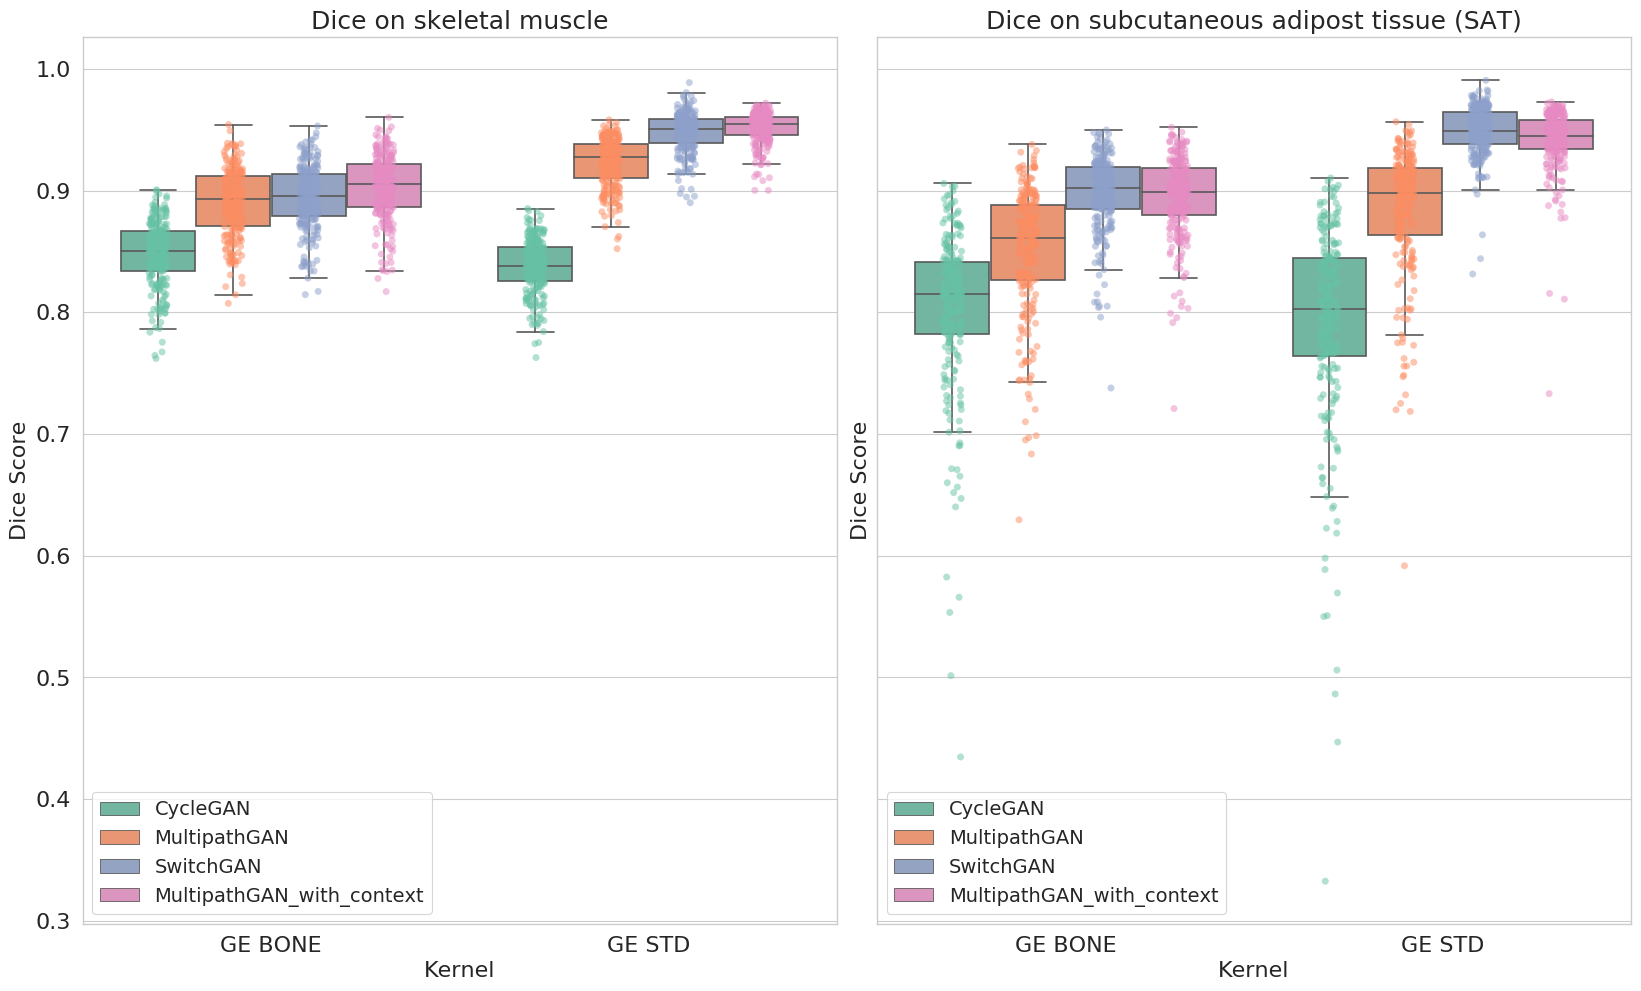

In [10]:
muscle_df = pd.DataFrame(muscle_data)
fat_df = pd.DataFrame(fat_data)

fig, axes = plt.subplots(1, 2, figsize=(16.5, 10), sharey=True)
# Plot the muscle data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=muscle_df, ax=axes[0], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles[0:4], labels[0:4], loc='best', fontsize=14)
axes[0].set_title("Dice on skeletal muscle", fontsize=18)
axes[0].set_xlabel("Kernel", fontsize = 16)
axes[0].set_ylabel("Dice Score", fontsize = 16)
axes[0].tick_params(axis='x', labelsize=16)
axes[0].tick_params(axis='y', labelsize=16)

# Plot the fat data
sns.boxplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', showfliers=False)
sns.stripplot(x='Kernel', y='Value', hue='Method', data=fat_df, ax=axes[1], palette='Set2', dodge=True, alpha=0.5)
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles[0:4], labels[0:4], loc='lower left', fontsize=14)
axes[1].set_title("Dice on subcutaneous adipost tissue (SAT)", fontsize=18)
axes[1].set_xlabel("Kernel", fontsize = 16)
axes[1].set_ylabel("Dice Score", fontsize = 16)
axes[1].tick_params(axis='x', labelsize=16)
axes[1].tick_params(axis='y', labelsize=16)
plt.tight_layout()
plt.show()

In [30]:
merged_bonetob30f

,Patient,Dice_Multipath_Muscle,Dice_CycleGAN_Muscle,Dice_SwitchGAN_Muscle,Dice_Multipath_Fat,Dice_CycleGAN_Fat,Dice_SwitchGAN_Fat,Dice_Multipath_with_anatomy_context_Muscle,Dice_Multipath_with_anatomy_Fat
0,100440,0.884353,0.843899,0.880525,0.902171,0.871793,0.921342,0.887027,0.922333
1,100451,0.839028,0.783649,0.838057,0.843664,0.832552,0.885929,0.839990,0.882262
2,100458,0.914961,0.863485,0.901328,0.893848,0.822811,0.905566,0.912487,0.898564
3,100494,0.921148,0.882155,0.915230,0.856360,0.780997,0.892609,0.922817,0.888144
4,100496,0.893866,0.844765,0.881131,0.872911,0.821802,0.891983,0.890502,0.883422
...,...,...,...,...,...,...,...,...,...
235,217724,0.807316,0.787504,0.833921,0.827024,0.805821,0.867883,0.834902,0.864780
236,217753,0.900882,0.852394,0.881101,0.931500,0.899730,0.933981,0.896938,0.939462
237,218149,0.848376,0.805856,0.865987,0.858807,0.816781,0.912075,0.869437,0.907085
238,218250,0.828867,0.775428,0.837443,0.865299,0.822729,0.899423,0.834270,0.899103
